In [1]:
import scipy as scp
import numpy as np
import h5py

import seaborn as sns
import matplotlib.pyplot as plt

### Decription
Preprocessed data (already disretized), for two cells, two stimuli (binary noise and discretized gauss noise).

For cell 2 only binary stimulus.

Be aware that the stimulus has a time resolution of 1ms but the response has bins of 10ms.

In [19]:
"""
load data
"""

# choose cell
filename = 'cell1.hdf5'
#filename = 'cell2.hdf5'

f = h5py.File(filename, 'r')

for item in f.attrs:
    print(item, f.attrs[item])
    
stim_binary = f['stim_binary'][:]
r_binary = f['r_binary'][:]

if filename=='cell1.hdf5':
    stim_gauss = f['stim_gauss'][:]
    r_gauss = f['r_gauss'][:]

f.close()


# choose data
light = stim_gauss
data = r_binary

# stim time with time resolution of dt =1ms
stimT = np.arange(0, len(light),1)/1000



"""
load df/f for first cell binary stimulus
"""
print('loading df/f for first cell:')

filename = 'cell1_dff.hdf5'

f = h5py.File(filename, 'r')

for item in f.attrs:
    print(item, f.attrs[item])
    
dff = f['dff_binary'][:]


f.close()


dt[ms] for r = 10
dt[ms] for stim = 1
info: Stim and vesicle release of one cell, 4 recordings per stim, binned sum for r but raw for stim (dt=1)
loading df/f for first cell:
dt[ms] for dff = 1
info: df/f for cell 1 (dt=1)


In [10]:
"""
number of traces per cell/experiment
"""

print('Nr traces for binary stimulus:', len(r_binary))
print('Nr traces for gauss stimulus:', len(r_gauss))


Nr traces for binary stimulus: 4
Nr traces for gauss stimulus: 4


In [11]:
"""
Helper for raster plot
"""

def plot_raster1_new(ax, trace, dt=0.01, color='b', offset=0, label=None, scalebar=False, scalebarcolor='b', 
                     normalize=True, upper=7):
    """
    plots a raster of one trace, centered at offset
    ---
    trace: 1d trace containing the quantal events
    dt: time resolution of trace in sec
    normalize: all data is alway plotted to y-axis [0,upper]
    """
    time = np.arange(0, len(trace)) * dt
    timepts = time[trace != 0]
    amps = trace[trace != 0]
   
    # version at baseline
    ax.vlines(timepts, 0, amps + offset, color=color, label=label)

    # plot scalebar
    if scalebar:
        ax.vlines(time[-3], 0, 5, color=scalebarcolor, linewidths=2)
        plt.text(time[-3] + 0.3, 2, '5 vesicles')

    plt.xlim(time[0], time[-1])
    # plt.xlabel('sec')
    plt.yticks([])
    # plt.legend()
    plt.xticks([])
    # sns.despine()
    
    if normalize:
        plt.ylim(0,upper)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

Text(23.999, -0.5, '1 sec')

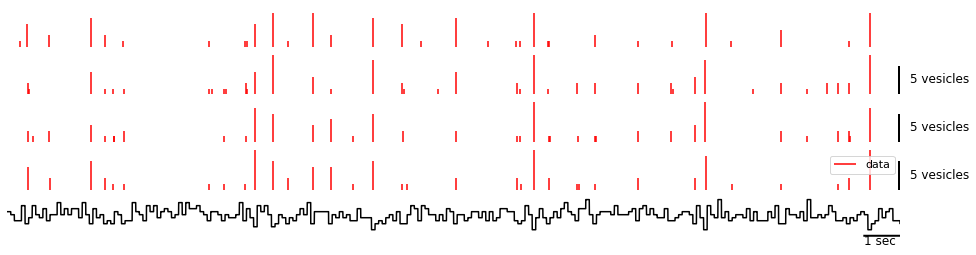

In [13]:
"""
plot data 
"""

# choose number of traces (2 or 4 depending on data)
ntraces =4

sns.set_context("notebook")

# specify boundaries for plotting
S0 = 4500
S = 7000

t_plot = np.arange(0, S*10-S0*10)/1000

plt.figure(1, figsize=(16,6))


# plot data traces
yscalebar=False
for i in range(ntraces):
    ax=plt.subplot(7,1,i+2+1)
    if i==1:
        yscalebar=True
    plot_raster1_new(ax,data[i,S0:S],  color='r',  label='data', scalebar=yscalebar, scalebarcolor='black')
plt.legend()

# plot stimulus
ax=plt.subplot(7,1,7)
plt.plot(t_plot, light[S0*10:S*10], color='black')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(t_plot[0], t_plot[-1])

#sns.despine()
plt.yticks([])
plt.xticks([])
#plt.xlabel('sec')

#scalebar
scalebar = np.ones(len(t_plot)) * (-0.2)
for i in range(len(scalebar)):
    if i>len(scalebar) or i<len(scalebar)-1000: # 1 tpt is 1ms => 1000 = 1sec
        scalebar[i] = np.nan

plt.plot(t_plot, scalebar, linewidth=2, color = 'black' )
plt.text(t_plot[-1]-1,-0.5,'1 sec')



Text(12.999, -1, '1 sec')

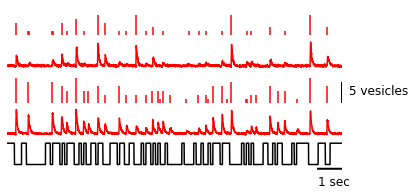

In [21]:
"""
including dF/F

CHECK if correct cell is chosen. 
only correct for cell1, binary stimulus.
"""
sns.set_context("notebook")
S0 = 3500 # in 10ms
S = 4900

stim=stim_binary

t_plot = np.arange(0, S*10-S0*10)/1000

plt.figure(1, figsize=(6,3))
color=['r', 'r']

# plot datatraces
yscalebar=False
for i in range(2):
    ax=plt.subplot(5,1,i*2+1)
    if i==1:
        yscalebar=True
    #plot discrete
    plot_raster1_new(ax,data[i,S0:S],  color=color[i],  label='data', scalebar=yscalebar, scalebarcolor='black')

    ax=plt.subplot(5,1,(i+1)*2)
    # plot dF/F
    plt.plot(t_plot, dff[i][S0*10:S*10],  color=color[i],  label='data')
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(t_plot[0], t_plot[-1] )

    
    

# plot stimulus
ax=plt.subplot(5,1,5)
plt.plot(t_plot, stim[S0*10:S*10], color='black')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(t_plot[0], t_plot[-1] )

#sns.despine()
plt.yticks([])
plt.xticks([])
#plt.xlabel('sec')

#scalebar
scalebar = np.ones(len(t_plot)) * (-0.2)
for i in range(len(scalebar)):
    if i>len(scalebar) or i<len(scalebar)-1000: # 1 tpt is 1ms => 1000 = 1sec
        scalebar[i] = np.nan

plt.plot(t_plot, scalebar, linewidth=2, color = 'black' )
plt.text(t_plot[-1]-1,-1,'1 sec')


